<a href="https://colab.research.google.com/github/Kaustubh-Amare/cardio-vacular-risk-estimation/blob/main/cardio_vascular_risk__prediction_ML_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Cardio Vascular Risk Detection**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = '/content/drive/MyDrive/DATA_SCI_almabetter/drive_data/data_cardiovascular_risk.csv'
df=pd.read_csv(file_path)


> making copy of dataset

In [3]:
patients_df = df.copy()

# Data overview

In [4]:
patients_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
patients_df.tail(20)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3370,3370,46,1.0,F,YES,30.0,0.0,0,0,0,219.0,107.0,69.0,21.40,66.0,NaN,0
3371,3371,55,2.0,F,NO,0.0,1.0,0,1,0,285.0,158.0,98.0,30.23,70.0,88.0,0
3372,3372,43,2.0,F,YES,20.0,0.0,0,0,0,276.0,99.0,62.0,22.17,60.0,80.0,0
3373,3373,58,1.0,F,NO,0.0,0.0,0,0,1,260.0,85.5,51.0,20.76,87.0,206.0,1
3374,3374,67,2.0,M,YES,60.0,0.0,0,1,0,261.0,170.0,100.0,22.71,72.0,79.0,1
3375,3375,52,1.0,M,YES,20.0,0.0,0,1,0,200.0,141.0,81.5,26.56,70.0,85.0,0
3376,3376,52,1.0,F,NO,0.0,0.0,0,1,0,220.0,163.0,87.0,25.12,100.0,94.0,0
3377,3377,37,1.0,M,YES,25.0,0.0,0,0,0,243.0,125.0,75.0,29.19,60.0,78.0,0
3378,3378,39,3.0,F,YES,NaN,0.0,0,0,0,197.0,126.5,76.5,19.71,55.0,63.0,0
3379,3379,39,1.0,M,YES,30.0,0.0,0,0,0,292.0,120.0,85.0,31.09,85.0,NaN,0


In [6]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
patients_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


>experiment


In [8]:
def Complete_columns_info(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        unique_val= df.nunique()
        mz_table = pd.concat([mis_val, mis_val_percent, unique_val], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'No of Null Values', 1 : '% of null values', 2 : 'No of unique values' })
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table.sort_values('% of null values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"rows")
        return mz_table


In [9]:
Complete_columns_info(patients_df)

 selected dataframe has 17 columns and 3390 rows


,No of Null Values,% of null values,No of unique values,Data Type
glucose,304,9.0,132,float64
education,87,2.6,4,float64
BPMeds,44,1.3,2,float64
totChol,38,1.1,240,float64
cigsPerDay,22,0.6,32,float64
BMI,14,0.4,1259,float64
heartRate,1,0.0,68,float64
id,0,0.0,3390,int64
diaBP,0,0.0,142,float64
sysBP,0,0.0,226,float64


## Change Data types for more suitable values.

In [10]:
 # sex column data conversion done successfully
patients_df['sex']= patients_df['sex'].astype('string')      

In [11]:
 # sex column data conversion done successfully
patients_df['is_smoking']= patients_df['is_smoking'].astype('string')      

In [12]:
Complete_columns_info(patients_df)

 selected dataframe has 17 columns and 3390 rows


,No of Null Values,% of null values,No of unique values,Data Type
glucose,304,9.0,132,float64
education,87,2.6,4,float64
BPMeds,44,1.3,2,float64
totChol,38,1.1,240,float64
cigsPerDay,22,0.6,32,float64
BMI,14,0.4,1259,float64
heartRate,1,0.0,68,float64
id,0,0.0,3390,int64
diaBP,0,0.0,142,float64
sysBP,0,0.0,226,float64


## null values treatment


>education

In [13]:
patients_df['education'].value_counts()


1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

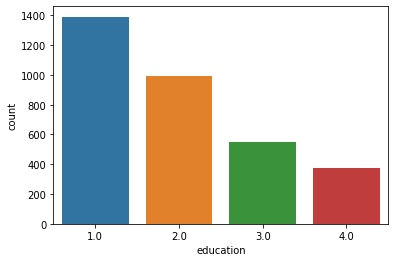

In [14]:
# count plot on single categorical variable
sns.countplot(x ='education', data = patients_df)
 
# Show the plot
plt.show()

 The mode value is: 1.0


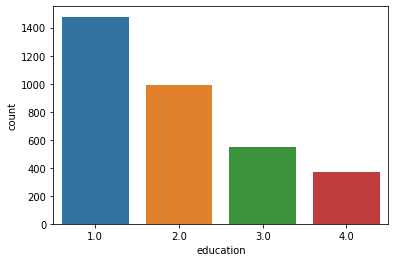

In [15]:
#Finding the mode value and replacing with the null values present.
modeEducation = patients_df['education'].mode()
print(f' The mode value is: {modeEducation[0]}')
patients_df['education'].fillna(value=modeEducation[0], inplace = True)

# count plot on single categorical variable , filling education null values 
sns.countplot(x ='education', data = patients_df)
 
# Show the plot
plt.show()


> Bp meds null values


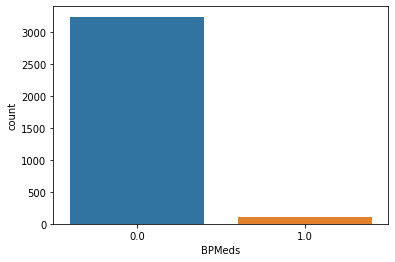

In [16]:
# count plot on single categorical variable
sns.countplot(x ='BPMeds', data = patients_df)
 
# Show the plot
plt.show()

 The mode value is: 0.0


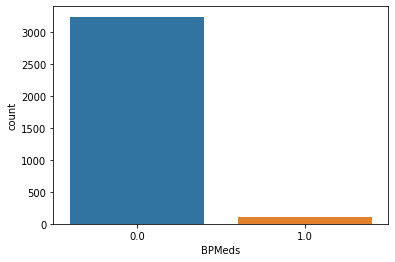

In [17]:
#Finding the mode value and replacing with the null values present.
modeBPmeds = patients_df['BPMeds'].mode()
print(f' The mode value is: {modeBPmeds[0]}')
patients_df['education'].fillna(value=modeBPmeds[0], inplace = True)

# count plot on single categorical variable , filling education null values 
sns.countplot(x ='BPMeds', data = patients_df)
 
# Show the plot
plt.show()


>Total cholestrol

In [18]:
modeBPmeds = patients_df['totChol'].median()
print(f' The mode value is: {modeBPmeds[0]}')
patients_df['education'].fillna(value=modeBPmeds[0], inplace = True)

IndexError: ignored

> Target variable: TenYearCHD

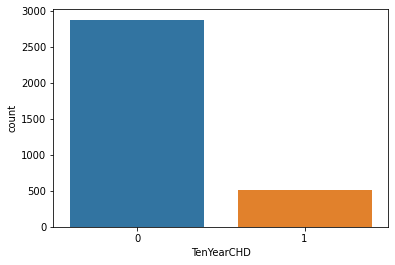

In [19]:
# count plot on single categorical variable
sns.countplot(x ='TenYearCHD', data = patients_df)
 
# Show the plot
plt.show()

As we can see that is imbalance for we will rectify this in later part of the project